In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
M_path = "cache/_M/"

In [3]:
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, N0_offset=2)
#fisher.setup_bispectra(M_path)

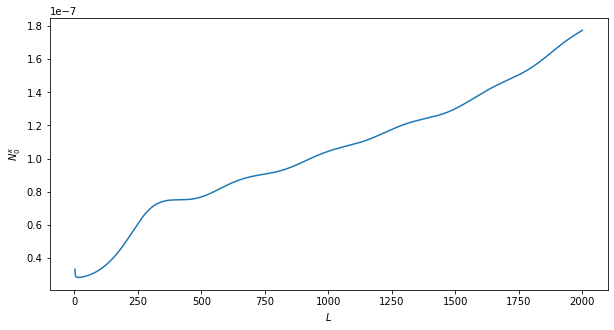

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [5]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)

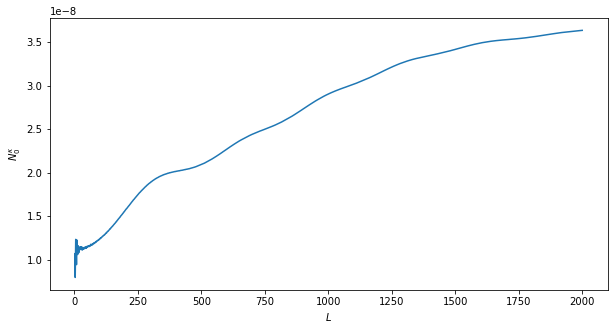

In [6]:
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [10]:
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
print("No foreground (S/N)")
print("---------------------------")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k = {np.sqrt(F_conv_rot)}")
F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F_gal_rot)}")
F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F_gal_conv_rot)}")
F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"IIw = {np.sqrt(F_cib_rot)}")
F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Ikw = {np.sqrt(F_cib_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.5031884105269822
kkw + one N_k = 2.183905031136963
kkw + no N_k = 2.790628010741719
ggw = 0.5938235429220576
gkw = 7.6830243373481935


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


IIw = 0.4846368907544116
Ikw = 5.368877823917671
---------------------------
Time = 175.93672490119934


In [11]:
# Array Method
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
print("No foreground (S/N)")
print("---------------------------")
Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"kkw = {np.sqrt(np.sum(F_conv_rot))}")
Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one", arr=True)
print(f"kkw + one N_k = {np.sqrt(np.sum(F_conv_rot))}")
Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none", arr=True)
print(f"kkw + no N_k = {np.sqrt(np.sum(F_conv_rot))}")
Ls, F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"ggw = {np.sqrt(np.sum(F_gal_rot))}")
Ls, F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"gkw = {np.sqrt(np.sum(F_gal_conv_rot))}")
Ls, F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"IIw = {np.sqrt(np.sum(F_cib_rot))}")
Ls, F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"Ikw = {np.sqrt(np.sum(F_cib_conv_rot))}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.5031884105269817
kkw + one N_k = 2.5210283665949555
kkw + no N_k = 2.7906280107417185
ggw = 0.5938235429220576
gkw = 7.683024337348193
IIw = 0.4846368907544115
Ikw = 5.36887782391767
---------------------------
Time = 24.837841987609863


In [12]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (baseline) (S/N)")
print("---------------------------")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k = {np.sqrt(F_conv_rot)}")
F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F_gal_rot)}")
F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F_gal_conv_rot)}")
F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"IIw = {np.sqrt(F_cib_rot)}")
F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Ikw = {np.sqrt(F_cib_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


Foreground (baseline) (S/N)
---------------------------
kkw = 0.4990870758766568
kkw + one N_k = 0.8891658967743348
kkw + no N_k = 1.2553892801900561
ggw = 0.280547954180166
gkw = 2.7684110925158514
IIw = 0.20925820420419744
Ikw = 1.920007782018018
---------------------------
Time = 1.7806358337402344


In [13]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (goal) (S/N)")
print("---------------------------")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k = {np.sqrt(F_conv_rot)}")
F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F_gal_rot)}")
F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F_gal_conv_rot)}")
F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"IIw = {np.sqrt(F_cib_rot)}")
F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Ikw = {np.sqrt(F_cib_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

Foreground (goal) (S/N)
---------------------------
kkw = 0.7464317198679031
kkw + one N_k = 1.1995976359883822
kkw + no N_k = 1.5846188640948238
ggw = 0.3482581570118035
gkw = 3.8233621812957743
IIw = 0.25668890686230017
Ikw = 2.651577981414293
---------------------------
Time = 1.7939610481262207


In [14]:
def get_Ls_sample(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

149.6
689.1090909090909
988.2727272727273
120.8
358.4545454545455
933.1636363636364
126.8
334.83636363636367
838.6909090909091
27.175929069519043


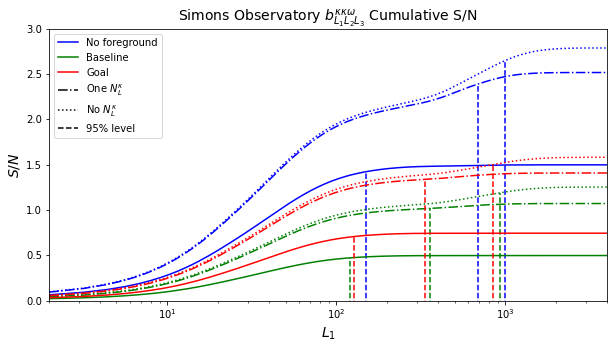

In [15]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red"]
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["No foreground", "Baseline", "Goal"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 3)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

120.8
126.8
547.4000000000001
531.6545454545455
2428.77245508982
2264.1676646706587


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


988.2727272727273


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


941.0363636363637


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2488.6287425149703


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: overflow encountered in exp
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(thing) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: overflow encountered in exp
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(thing) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2324.0239520958085
49.43709182739258


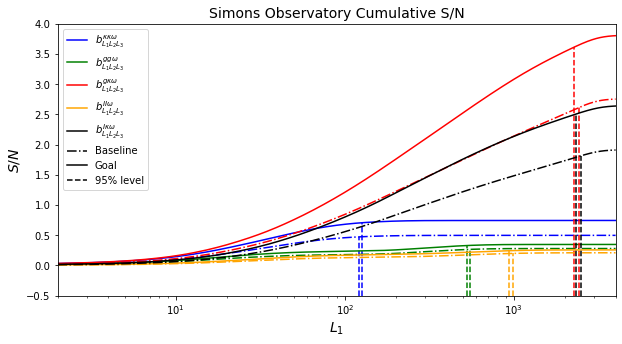

In [16]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red", "orange", "k"]
N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["Baseline", "Goal"]
bi_labels = ["$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ ", "$b_{L_1L_2L_3}^{gg\omega}$ ", "$b_{L_1L_2L_3}^{g\kappa\omega}$ ", "$b_{L_1L_2L_3}^{II\omega}$ ", "$b_{L_1L_2L_3}^{I\kappa\omega}$ "]
linestyles = ["dashdot", "-"]
offsets = [2,2]
N0_ell_factors = [False, False] 
t0 = time.time()
for jjj in range(5):
    plt.plot([1e10], [1e10], label=bi_labels[jjj], color=colors[jjj])
    for iii , N0_file in enumerate(N0_files):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        if jjj == 0:
            F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 1:
            F_conv_rot = fisher.get_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 2:
            F_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 3:
            F_conv_rot = fisher.get_cib_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 4:
            F_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        plt.semilogx(Ls, SNs, color=colors[jjj], linestyle=linestyles[iii])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[jjj], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.plot([1e10], [1e10], label="Baseline", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="Goal", linestyle="-", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.title("Simons Observatory Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.ylim(-0.5, 4)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

In [10]:
# CAMB
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky=f_sky, auto=True, camb=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky=f_sky, auto=False, camb=True)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.2066808457302894
Cross ps S/N = 20.82505660462374
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047772545626157924
Cross ps S/N = 9.52417000129666
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08215667260988076
Cross ps S/N = 11.768807786632827
---------------------------
65.73618507385254


In [8]:
# My Cl_omega
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
ell_file = "cache/_M/kappa-kappa/20000_1000/ells.npy"
M_file = "cache/_M/kappa-kappa/20000_1000/M.npy"
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, ell_file=ell_file, M_file=M_file, f_sky=f_sky, auto=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, ell_file=ell_file, M_file=M_file, f_sky=f_sky, auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.20757108108020303
Cross ps S/N = 20.7935976047498
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047971150124527
Cross ps S/N = 9.51668422260621
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08256013891070675
Cross ps S/N = 11.76429330286749
---------------------------
120.41762375831604
